# Assignment 3
ENV 717 - Spring 2023

Al Ghiffary Dazul Herman

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ENV717')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/ENV717'

## Question 1
(25%) Download the file eGRID2020.xls from the eGRID website released on 1/27/2022, which contains the most recent data on power generation units for the U.S.

Look at the PLNT20 tab and create a subset of power plants that contains only those plants with the following characteristics: 

-Column L, Balancing Authority Code, is PJM Interconnection, LLC.

-Column Y, Plant primary fuel category is equal to Coal, Gas, Hydro, or Nuclear. 

-Column AA, Plant capacity factor, is 0.1 or greater. 

-Column AB, Plant nameplate capacity (MW), is 10 or more. 


### a. (10%) What is the total installed capacity (in MW) from this subset of plants?

In [52]:
#Read excel file from the EPA website
egrid_plnt20=pd.read_excel("https://www.epa.gov/system/files/documents/2022-01/egrid2020_data.xlsx", 
                       sheet_name="PLNT20",keep_default_na=False,header=1)
egrid_plnt20.head(10)

,SEQPLT20,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
0,1,2020,AK,7-Mile Ridge Wind Project,60814,Alaska Power and Telephone Co,219,Alaska Power and Telephone Co,219,Electric Utility,...,,,,,,,,,,
1,2,2020,AK,Agrium Kenai Nitrogen Operations,54452,Homer Electric Assn Inc,19558,Agrium US Inc,179,Industrial CHP,...,,,,,,,,,,
2,3,2020,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,,,,,,,,,,
3,4,2020,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
4,5,2020,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0,0,0,0,0,1,0,0,1,0
5,6,2020,AK,Anchorage 1,75,Chugach Electric Assn Inc,3522,Chugach Electric Assn Inc,3522,Electric Utility,...,0,0,0,0,0,1,0,0,1,0
6,7,2020,AK,Angoon,7462,"Inside Passage Elec Coop, Inc",18963,"Inside Passage Elec Coop, Inc",18963,Electric Utility,...,0,0,0,0,0,1,0,0,1,0
7,8,2020,AK,Aniak,7182,Aniak Light & Power Co Inc,4959,Aniak Light & Power Co Inc,4959,Electric Utility,...,0,0,0,0,0,1,0,0,1,0
8,9,2020,AK,Annex Creek,62,Alaska Electric Light&Power Co,213,Alaska Electric Light&Power Co,213,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
9,10,2020,AK,Auke Bay,7250,Alaska Electric Light&Power Co,213,Alaska Electric Light&Power Co,213,Electric Utility,...,,,,,,,,,,


In [53]:
#Change Capacity factor to numeric
egrid_plnt20.CAPFAC = pd.to_numeric(egrid_plnt20.CAPFAC)
egrid_plnt20.NAMEPCAP = pd.to_numeric(egrid_plnt20.NAMEPCAP)

#Create masks to filter the plants by 

#Balancing Authority Code = "PJM"
mask_pjm = (egrid_plnt20.BACODE == 'PJM')

#Plant primary fuel category = "COAL", "GAS", "HYDRO", "NUCLEAR"
mask_cghn = (egrid_plnt20.PLFUELCT == 'COAL') | (egrid_plnt20.PLFUELCT == 'GAS') | (egrid_plnt20.PLFUELCT == 'HYDRO') | (egrid_plnt20.PLFUELCT == 'NUCLEAR')

#Plant capacity factor >= 0.1
mask_capfac = (egrid_plnt20.CAPFAC >= 0.1)

#Plant nameplate capacity >= 10 MW
mask_nameplatecap = (egrid_plnt20.NAMEPCAP >= 10) 

#Apply all filters
egrid_plnt20_q1 = egrid_plnt20[mask_pjm & mask_cghn & mask_capfac & mask_nameplatecap]
#print("Number of plants after applying filters: ", df_plnt_sub.shape[0])
egrid_plnt20_q1[['BACODE','PLFUELCT','CAPFAC','NAMEPCAP']].head()

#Sum the installed capacity of the plants in the subset
total_cap = egrid_plnt20_q1.NAMEPCAP.sum()

#Print the result
print("Total installed capacity in this subset is {:,.2f} MW".format(total_cap))

Total installed capacity in this subset is 145,756.10 MW


### b. (15%) Assume a competitive electricity market which has, on the supply side, a number of nuclear, coal-fired, natural gas-fired, and hydropower generators as presented in this subset of plants. 

Use the information given in columns AB, AJ, AN, AV: Plant nameplate capacity (MW), Plant annual heat input (MMBtu), Plant annual net generation (MWh), Plant annual CO2 equivalent emissions (tons), to build a supply curve or electricity. 

-Assume the short-run marginal cost of natural-gas-fired and coal-fired generators is the cost of fuel only. 

-Assume the short-run marginal cost of nuclear energy is $9/MWh. 

-Graph the supply curve (aggregated short-run marginal cost) for electricity (at a given hour of the day). 

-Assume the average coal and natural-gas prices for 2021 as reported by EIA in $/MBTU . 

For this problem assume that there is no tax on CO2 equivalent emissions. This will change in the next assignment. Please copy the graph in your word document and do not forget to insert a title and to label the axes. Please differentiate the nuclear, coal plants, natural gas and hydro plants by graphing them with different colors and markers. Also remember that another way to refer to Million Btu is MMBtu.


In [54]:
#Known information: NAMEPCAP, PLHTIAN, PLNGENAN, PLCO2EQA
#SRMC_coal = Average coal prices for 2021: $1.98/MMBtu
#SRMC_NG = Average NG prices for 2021: $5.20/MMBtu
#SRMC_nuclear = $9/MWh
#Supply curve of aggregated SRMC for electricity at a given hour of the day-> $/MWh

In [55]:
#Select the necessary columns
egrid_plnt20_q1_specific = egrid_plnt20_q1.loc[:,['PSTATABB','PNAME','BACODE','PLFUELCT','CAPFAC','NAMEPCAP','PLHTIAN','PLNGENAN','PLCO2EQA']].copy()
egrid_plnt20_q1_specific.PLHTIAN = pd.to_numeric(egrid_plnt20_q1_specific.PLHTIAN)
egrid_plnt20_q1_specific.PLNGENAN = pd.to_numeric(egrid_plnt20_q1_specific.PLNGENAN)
egrid_plnt20_q1_specific.PLCO2EQA = pd.to_numeric(egrid_plnt20_q1_specific.PLCO2EQA)

In [56]:
#Split the data frame based on the fuel category
coalSorted=egrid_plnt20_q1_specific[egrid_plnt20_q1_specific["PLFUELCT"]=="COAL"]
gasSorted=egrid_plnt20_q1_specific[egrid_plnt20_q1_specific["PLFUELCT"]=="GAS"]
nuclearSorted=egrid_plnt20_q1_specific[egrid_plnt20_q1_specific["PLFUELCT"]=="NUCLEAR"]
hydroSorted=egrid_plnt20_q1_specific[egrid_plnt20_q1_specific["PLFUELCT"]=="HYDRO"]

In [57]:
#Add the short-run marginal cost for each fuel to the new dataframes. Convert $/MMBtu to $/MWh
#Create a new column for the cumulative capacity
coalSorted['SRMC']=1.98*(coalSorted.PLHTIAN/coalSorted.PLNGENAN)
coalSorted['CumCapacity']=0
gasSorted['SRMC']=5.20*(gasSorted.PLHTIAN/gasSorted.PLNGENAN)
gasSorted['CumCapacity']=0
nuclearSorted['SRMC']=9
nuclearSorted['CumCapacity']=0
hydroSorted['SRMC']=0
hydroSorted['CumCapacity']=0

<ipython-input-57-46127b03591d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coalSorted['SRMC']=1.98*(coalSorted.PLHTIAN/coalSorted.PLNGENAN)
<ipython-input-57-46127b03591d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coalSorted['CumCapacity']=0
<ipython-input-57-46127b03591d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [58]:
#combine all four data frames
frames = [coalSorted, gasSorted, nuclearSorted, hydroSorted]
result = pd.concat(frames)
#Sort values based on the lowest SRMC
result=result.sort_values('SRMC')
#Complete the cumulative capacity column
result.iloc[0,10]=result.iloc[0,5]
for i in range (1,len(result)):  
                result.iloc[i,10]=result.iloc[i-1,10]+result.iloc[i,5]
result.head(10)

,PSTATABB,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,SRMC,CumCapacity
12587,WV,Winfield,PJM,HYDRO,0.47411,24.5,NaN,101754.000,NaN,0.0,24.5
10334,PA,Safe Harbor,PJM,HYDRO,0.26266,417.5,NaN,960618.000,NaN,0.0,442.0
10315,PA,Piney,PJM,HYDRO,0.26367,30.0,NaN,69291.999,NaN,0.0,472.0
10247,PA,Lake Lynn Hydro Station,PJM,HYDRO,0.25170,51.2,NaN,112892.000,NaN,0.0,523.2
10226,PA,Holtwood,PJM,HYDRO,0.40702,247.3,NaN,881737.999,NaN,0.0,770.5
10164,PA,Conemaugh Hydro Plant,PJM,HYDRO,0.30198,15.0,NaN,39680.000,NaN,0.0,785.5
10125,PA,Allegheny Hydro No 9,PJM,HYDRO,0.64862,17.8,NaN,101138.000,NaN,0.0,803.3
10124,PA,Allegheny Hydro No 8,PJM,HYDRO,0.70014,13.6,NaN,83412.000,NaN,0.0,816.9
10383,PA,Wallenpaupack,PJM,HYDRO,0.21194,40.0,NaN,74265.000,NaN,0.0,856.9
9577,OH,Greenup Hydro,PJM,HYDRO,0.37830,70.2,NaN,232635.000,NaN,0.0,927.1


In [59]:
#Split the final dataframe again based on the fuel type for plotting purposes
coalSorted2=result[result["PLFUELCT"]=="COAL"]
gasSorted2=result[result["PLFUELCT"]=="GAS"]
nuclearSorted2=result[result["PLFUELCT"]=="NUCLEAR"]
hydroSorted2=result[result["PLFUELCT"]=="HYDRO"]

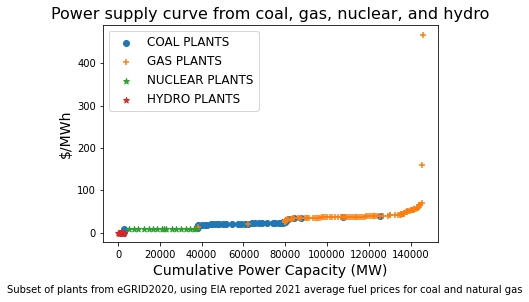

In [60]:
#Create the supply curve
plt.scatter(coalSorted2["CumCapacity"],coalSorted2["SRMC"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted2["CumCapacity"],gasSorted2["SRMC"],marker="+",label="GAS PLANTS")
plt.scatter(nuclearSorted2["CumCapacity"],nuclearSorted2["SRMC"],marker="*",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted2["CumCapacity"],hydroSorted2["SRMC"],marker="*",label="HYDRO PLANTS")
plt.title("Power supply curve from coal, gas, nuclear, and hydro",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW)", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)

txt="Subset of plants from eGRID2020, using EIA reported 2021 average fuel prices for coal and natural gas"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.show()

##Question 3

(25%) Clear the market for a few levels of demand.

### a) (15%) Use the demand data found in 2. to find the percentiles 1, 5, 10, 30, 50, 70, 90, 100 for total annual demand. Write down those percentiles in the table below. If you are using excel, the function Percentile will be useful.  Percentile (Array, 0.9), where array is the matrix containing all the 8760 values of hourly demand in 2019 gives you the percentile 90%. 
### Using the supply curve found in 2, find the competitive market-clearing price for different load levels corresponding to each percentile. Use these results to fill out the following table:


In [61]:
#capacity for demand percentile 0.05 >= 65632.85 MW
#Market Clearing Price = $21.43/MWh
mask_nameplatecap_2 = (result.CumCapacity >= 65632.85) 
egrid_plnt20_q3 = result[mask_nameplatecap_2]
egrid_plnt20_q3.head(10)

,PSTATABB,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,SRMC,CumCapacity
10151,PA,"Brunner Island, LLC",PJM,COAL,0.12933,1624.2,1.991880e+07,1840170.0,1.347141e+06,21.432376,65662.1
9522,OH,Cardinal,PJM,COAL,0.55000,1880.4,9.843259e+07,9059773.0,1.017196e+07,21.512298,67542.5
3952,IL,Kincaid Generating Station,PJM,COAL,0.12771,1319.0,1.618769e+07,1475564.0,1.712217e+06,21.721610,68861.5
9573,OH,Gen J M Gavin,PJM,COAL,0.57495,2600.0,1.469374e+08,13095165.0,1.518354e+07,22.217064,71461.5
9686,OH,W H Sammis,PJM,COAL,0.22189,2468.1,5.387168e+07,4797478.0,5.695844e+06,22.233752,73929.6
11859,VA,Clover Power Station,PJM,COAL,0.16701,848.0,1.395958e+07,1240625.0,1.443150e+06,22.279071,74777.6
8134,NJ,Carneys Point,PJM,COAL,0.19170,285.0,5.456751e+06,478601.0,5.632210e+05,22.574894,75062.6
10227,PA,Homer City,PJM,COAL,0.16902,2012.0,3.399806e+07,2979035.0,3.516054e+06,22.596629,77074.6
10341,PA,Seward,PJM,COAL,0.31465,803.2,2.576541e+07,2213865.0,2.731502e+06,23.043644,77877.8
4528,KY,East Bend,PJM,COAL,0.33626,772.0,2.660883e+07,2274040.0,2.751004e+06,23.168234,78649.8


In [62]:
#capacity for demand percentile 0.1 >= 69010.10 MW
#Market Clearing Price = $22.21/MWh
mask_nameplatecap_3 = (result.CumCapacity >= 69010.10) 
egrid_plnt20_q3 = result[mask_nameplatecap_3]
egrid_plnt20_q3.head(10)

,PSTATABB,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,SRMC,CumCapacity
9573,OH,Gen J M Gavin,PJM,COAL,0.57495,2600.0,1.469374e+08,13095165.0,1.518354e+07,22.217064,71461.5
9686,OH,W H Sammis,PJM,COAL,0.22189,2468.1,5.387168e+07,4797478.0,5.695844e+06,22.233752,73929.6
11859,VA,Clover Power Station,PJM,COAL,0.16701,848.0,1.395958e+07,1240625.0,1.443150e+06,22.279071,74777.6
8134,NJ,Carneys Point,PJM,COAL,0.19170,285.0,5.456751e+06,478601.0,5.632210e+05,22.574894,75062.6
10227,PA,Homer City,PJM,COAL,0.16902,2012.0,3.399806e+07,2979035.0,3.516054e+06,22.596629,77074.6
10341,PA,Seward,PJM,COAL,0.31465,803.2,2.576541e+07,2213865.0,2.731502e+06,23.043644,77877.8
4528,KY,East Bend,PJM,COAL,0.33626,772.0,2.660883e+07,2274040.0,2.751004e+06,23.168234,78649.8
8273,NJ,Logan Generating Plant,PJM,COAL,0.20881,242.3,5.221543e+06,443202.0,5.391549e+05,23.327186,78892.1
10205,PA,Gilberton Power Company,PJM,COAL,0.81908,88.4,7.674403e+06,634279.0,9.127277e+05,23.956837,78980.5
12012,VA,Virginia City Hybrid Energy Center,PJM,COAL,0.14869,668.0,1.079323e+07,870065.0,9.137707e+05,24.562077,79648.5


In [63]:
#capacity for demand percentile 0.3 >= 79286.10  MW
#Market Clearing Price = $24.56/MWh
mask_nameplatecap_4 = (result.CumCapacity >= 79286.10) 
egrid_plnt20_q3 = result[mask_nameplatecap_4]
egrid_plnt20_q3.head(10)

,PSTATABB,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,SRMC,CumCapacity
12012,VA,Virginia City Hybrid Energy Center,PJM,COAL,0.14869,668.0,1.079323e+07,870065.000,913770.655,24.562077,79648.5
8345,NJ,Princeton University Cogeneration,PJM,GAS,0.13825,32.0,1.852346e+05,38755.000,10837.142,24.854085,79680.5
5413,MD,UMCP CHP Plant,PJM,GAS,0.33452,27.4,4.005711e+05,80293.000,23436.295,25.942106,79707.9
10162,PA,Colver Green Energy,PJM,COAL,0.47134,118.0,6.389008e+06,487212.000,242992.487,25.964541,79825.9
12556,WV,Grant Town Power Plant,PJM,COAL,0.73686,95.7,8.121428e+06,617730.000,839667.810,26.031481,79921.6
11918,VA,HP Hood CT,PJM,GAS,0.66132,15.0,4.367347e+05,86897.000,25551.136,26.134625,79936.6
8226,NJ,Hoffmann LaRoche,PJM,GAS,0.20327,22.6,2.041897e+05,40242.000,11946.104,26.385029,79959.2
9500,OH,Ashtabula,PJM,GAS,0.76274,26.1,9.109223e+05,174390.000,53293.454,27.162086,79985.3
10272,PA,Merck & Company - West Point,PJM,GAS,0.34266,95.7,1.527378e+06,287263.381,89359.657,27.648371,80081.0
10208,PA,Grays Ferry Cogen Partnership,PJM,GAS,0.67364,192.6,6.072476e+06,1136550.000,360195.291,27.783093,80273.6


In [64]:
#capacity for demand percentile 0.5 >= 85960.50 MW
#Market Clearing Price = $34.34/MWh
mask_nameplatecap_5 = (result.CumCapacity >= 85960.50) 
egrid_plnt20_q3 = result[mask_nameplatecap_5]
egrid_plnt20_q3.head(10)

,PSTATABB,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,SRMC,CumCapacity
11904,VA,Greensville County Power Station,PJM,GAS,0.68725,1773.3,7.050205e+07,10675865.0,4194082.832,34.340137,86154.6
10215,PA,Hamilton Patriot Generation Plant,PJM,GAS,0.81275,870.0,4.112944e+07,6194098.0,2446773.164,34.528532,87024.6
10144,PA,Birdsboro Power,PJM,GAS,0.78957,525.0,2.421044e+07,3631253.0,1440186.757,34.669658,87549.6
9555,OH,Dover,PJM,COAL,0.11099,53.6,9.142165e+05,52113.0,94188.678,34.735069,87603.2
10246,PA,Lackawanna Energy Center,PJM,GAS,0.63257,1665.0,6.189465e+07,9226342.0,3682014.383,34.884050,89268.2
9632,OH,Oregon Clean Energy Center,PJM,GAS,0.60910,1061.5,3.807099e+07,5663847.0,2264823.015,34.953121,90329.7
8282,NJ,"Mars Wrigley Confectionery US, LLC",PJM,GAS,0.55339,12.3,4.012132e+05,59627.0,23472.955,34.989329,90342.0
9527,OH,"Clean Energy Future - Lordstown, LLC",PJM,GAS,0.73212,962.0,4.154727e+07,6169694.0,2471570.317,35.017264,91304.0
4311,IN,St. Joseph Energy Center LLC,PJM,GAS,0.24738,2186.0,3.195126e+07,4737196.0,1900789.336,35.072763,93490.0
8308,NJ,Newark Energy Center,PJM,GAS,0.65766,735.0,2.866434e+07,4234390.0,1705232.943,35.200958,94225.0


In [65]:
#capacity for demand percentile 0.7 >= 96233.80 MW
#Market Clearing Price = $35.42/MWh
mask_nameplatecap_6 = (result.CumCapacity >= 96233.80) 
egrid_plnt20_q3 = result[mask_nameplatecap_6]
egrid_plnt20_q3.head(10)

,PSTATABB,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,SRMC,CumCapacity
8381,NJ,Sewaren Generating Station,PJM,GAS,0.35569,1176.9,24978556.00,3667054.0,1487478.238,35.420392,96883.1
10263,PA,"Marcus Hook Energy, LP",PJM,GAS,0.70854,836.1,35422167.38,5189530.0,2107357.864,35.493632,97719.2
9610,OH,Middletown Energy Center,PJM,GAS,0.71069,543.9,23119568.00,3386139.0,1375361.610,35.504081,98263.1
11961,VA,Panda Stonewall Power Project,PJM,GAS,0.69611,812.0,33868405.00,4951542.0,2014846.510,35.567851,99075.1
5423,MD,Wildcat Point Generation Facility,PJM,GAS,0.30990,1113.6,20770286.00,3023097.0,1235608.297,35.726769,100188.7
10289,PA,Moxie Freedom Generation Plant,PJM,GAS,0.61506,1058.0,39173822.00,5700469.0,2330344.820,35.734582,101246.7
10190,PA,Fairless Energy Center,PJM,GAS,0.66957,1338.0,54310170.00,7847977.0,3230934.493,35.985437,102584.7
12016,VA,Warren County Power Station,PJM,GAS,0.70558,1472.2,63064074.00,9099466.0,3751620.527,36.038729,104056.9
10229,PA,Hummel Station,PJM,GAS,0.59771,1194.4,43394136.00,6253834.0,2581410.643,36.081787,105251.3
11838,VA,Brunswick County Power Station,PJM,GAS,0.77259,1472.2,69586192.00,9963634.0,4139583.300,36.316890,106723.5


In [66]:
#capacity for demand percentile 0.9 >= 112019.30 MW
#Market Clearing Price = $36.83/MWh
mask_nameplatecap_7 = (result.CumCapacity >= 112019.30) 
egrid_plnt20_q3 = result[mask_nameplatecap_7]
egrid_plnt20_q3.head(10)

,PSTATABB,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,SRMC,CumCapacity
10222,PA,Hickory Run Energy Station,PJM,GAS,0.43500,1033.7,27905722.0,3938973.1,1659996.554,36.839489,112351.9
10234,PA,Hunterstown Combined Cycle,PJM,GAS,0.83527,898.0,46596373.0,6570656.0,2771970.538,36.876248,113249.9
11828,VA,Bear Garden Generating Station,PJM,GAS,0.87207,559.0,30382241.0,4270401.0,1807463.644,36.995976,113808.9
10194,PA,Fayette Power Company LLC,PJM,GAS,0.88171,644.1,35518016.0,4974896.0,2112920.559,37.125135,114453.0
10259,PA,"Lower Mount Bethel Energy, LLC",PJM,GAS,0.37932,651.6,15462154.0,2165186.0,919832.622,37.134547,115104.6
12008,VA,Tenaska Virginia Generating Station,PJM,GAS,0.51165,1011.4,32395611.0,4533164.0,1927309.215,37.161060,116116.0
5760,MI,New Covert Generating Project,PJM,GAS,0.69898,1176.0,51766839.0,7200741.0,3079665.042,37.383314,117292.0
8361,NJ,"Red Oak Power, LLC",PJM,GAS,0.38643,821.1,20034977.5,2779502.0,1191862.810,37.482212,118113.1
10252,PA,Liberty Electric Power Plant,PJM,GAS,0.69863,614.0,27416463.0,3757667.0,1630961.947,37.939926,118727.1
5348,MD,Keys Energy Center,PJM,GAS,0.68019,830.6,36145024.0,4949094.0,2150181.591,37.977481,119557.7


In [67]:
#capacity for demand percentile 1 >= 143864.00 MW
#Market Clearing Price = $59.63/MWh
mask_nameplatecap_8 = (result.CumCapacity >= 143864.00) 
egrid_plnt20_q3 = result[mask_nameplatecap_8]
egrid_plnt20_q3.head(10)

,PSTATABB,PNAME,BACODE,PLFUELCT,CAPFAC,NAMEPCAP,PLHTIAN,PLNGENAN,PLCO2EQA,SRMC,CumCapacity
10293,PA,New Castle,PJM,GAS,0.14865,424.4,6.338136e+06,552646.000,377066.431,59.637288,143986.7
8124,NJ,Bristol Myers Squibb Lawrenceville,PJM,GAS,0.21187,10.9,2.492830e+05,20230.000,14588.042,64.076698,143997.6
2682,DC,GSA Central Heating,PJM,GAS,0.52325,10.8,6.143997e+05,49504.000,35934.288,64.537787,144008.4
9680,OH,Tait Electric Generating Station,PJM,GAS,0.15971,680.6,1.192745e+07,952197.002,704459.300,65.136438,144689.0
5373,MD,NIH Cogeneration Facility,PJM,GAS,0.34195,50.0,1.899933e+06,149776.000,111153.594,65.962853,144739.0
9571,OH,Fremont Energy Center,PJM,GAS,0.29318,739.5,2.507274e+07,1899225.000,1491618.644,68.648132,145478.5
5307,MD,Cove Point LNG Terminal,PJM,GAS,0.30847,228.6,1.897857e+07,617726.999,1126290.306,159.760812,145707.1
11978,VA,Radford Army Ammunition Plant,PJM,GAS,0.15424,24.0,2.913001e+06,32428.000,170424.947,467.115037,145731.1
2714,DE,Red Lion Energy Center,PJM,GAS,0.93491,25.0,NaN,204746.000,NaN,NaN,145756.1


### b) (10%) Show graphically, how the market is cleared for an inelastic demand (i.e., in the same graph present both the supply curve and the vertical lines for percentiles of demand 5%, 50%, 90% and 100% in the same graph. Their intersection is the price).

In [68]:
pjm2022_demand=pd.read_excel("for Q3 market clearing price.xlsx","Sheet1",header=0) #1.
pjm2022_demand.head(10) #2. 

,Demand Percentile,Demand (MW),Market Clearing Price ($/MWh)
0,0.05,65632.85,NaN
1,0.10,69010.10,NaN
2,0.30,79286.10,NaN
3,0.50,85960.50,NaN
4,0.70,96233.80,NaN
5,0.90,112019.30,NaN
6,1.00,143864.00,NaN


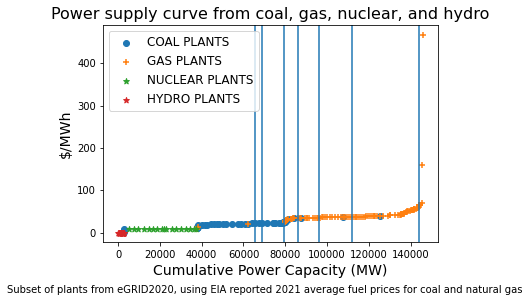

In [69]:
#Create the supply curve
plt.scatter(coalSorted2["CumCapacity"],coalSorted2["SRMC"],marker="o",label="COAL PLANTS")
plt.scatter(gasSorted2["CumCapacity"],gasSorted2["SRMC"],marker="+",label="GAS PLANTS")
plt.scatter(nuclearSorted2["CumCapacity"],nuclearSorted2["SRMC"],marker="*",label="NUCLEAR PLANTS")
plt.scatter(hydroSorted2["CumCapacity"],hydroSorted2["SRMC"],marker="*",label="HYDRO PLANTS")
plt.title("Power supply curve from coal, gas, nuclear, and hydro",fontsize=16)
plt.xlabel("Cumulative Power Capacity (MW)", fontsize=14)
plt.ylabel("$/MWh",fontsize=14)
plt.legend(fontsize=12)

txt="Subset of plants from eGRID2020, using EIA reported 2021 average fuel prices for coal and natural gas"
plt.figtext(0.5, -0.05, txt, wrap=True, horizontalalignment='center', fontsize=10)
plt.axvline(x=pjm2022_demand.iloc[0,1])
plt.axvline(x=pjm2022_demand.iloc[1,1])
plt.axvline(x=pjm2022_demand.iloc[2,1])
plt.axvline(x=pjm2022_demand.iloc[3,1])
plt.axvline(x=pjm2022_demand.iloc[4,1])
plt.axvline(x=pjm2022_demand.iloc[5,1])
plt.axvline(x=pjm2022_demand.iloc[6,1])
plt.show()